In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams["figure.figsize"] = [30.0,20.0]
from mpl_toolkits.mplot3d import Axes3D

In [3]:
houses = pd.read_csv("kc_house_data.csv")
print(houses.shape)
houses.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

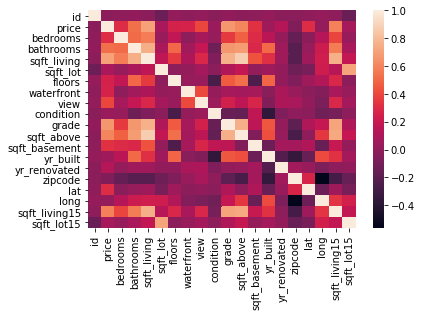

In [4]:
#check for correlation between variables
corr = houses.corr()
print(corr)             #correlation matrix
sns.heatmap(corr)
# sqft_living, grade, sqft_above and sqft_living15 seem to have a high influence in price

/home/manav/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/manav/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


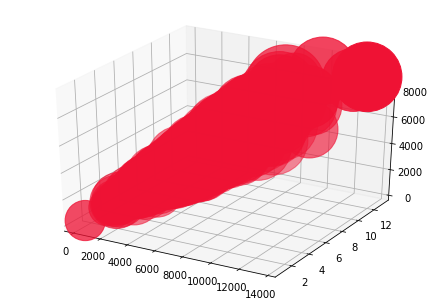

In [5]:
sqft_living = houses["sqft_living"].values
grade = houses["grade"].values
sqft_above = houses["sqft_above"].values
bathrooms = houses["bathrooms"].values
sqft_living15 = houses["sqft_living15"].values
price = houses["price"].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sqft_living, grade, sqft_above, bathrooms, sqft_living15, color="#ef1234")
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = np.array([sqft_living, grade, sqft_above, bathrooms, sqft_living15]).T
y = np.array(price)

In [11]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = model.score(x,y)
print(rmse)
print(r2)

247847.32161370694
0.544219816528976


In [9]:
print(model.coef_)
print(model.intercept_)

[1.26542816e+05 5.91707190e+01 3.60929379e+04 8.33908321e+01]
-776642.585983643
